# **1) import 라이브러리**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
# 각자 자기가 원하는 스타일을 지정해야함

import missingno as msno

#for ignoring warning
import warnings
warnings.filterwarnings('ignore')

# **2) 데이터 전처리**

In [98]:
df = pd.read_csv("../input/5w-svm/voice.csv", sep = ',')

In [99]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [101]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [102]:
# object -> float/int로 변환
df.loc[df['label'] == 'male', 'sex'] = 0
df.loc[df['label'] == 'female', 'sex'] = 1

df.drop('label', axis=1, inplace=True)

In [103]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sex
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0


# **3. 데이터 상관관계 파악**

**다 안함!**

In [104]:
#상관관계 그래프

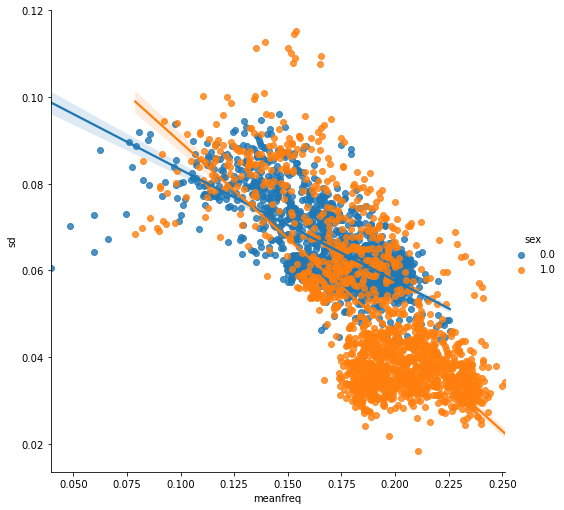

In [105]:
sns.lmplot(data=df, x="meanfreq", y="sd", hue="sex", size = 7)

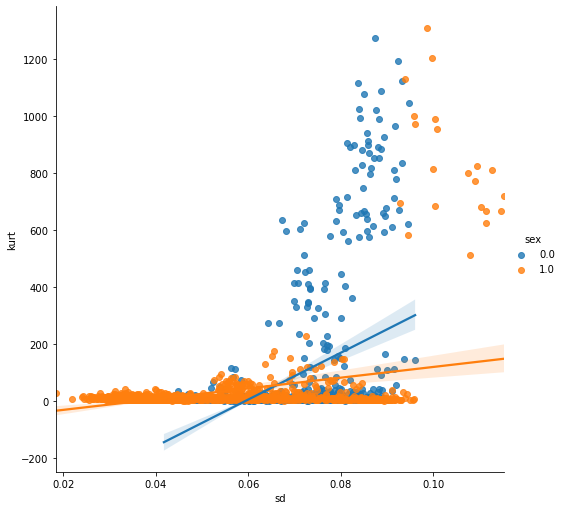

In [106]:
sns.lmplot(data=df, x="sd", y="kurt", hue="sex", size = 7)

# **데이터 표준화**

**독립 변수 -> x_data, 종속 변수(레이블) -> y_data**

In [107]:
x_data = df.iloc[:, :-1]
y_data = df['sex']

In [108]:
x_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [109]:
y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sex, dtype: float64

In [110]:
# 데이터 표준화 작업
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

In [111]:
#train set와 test set으로 분리해야함, 무작위로! train:70%, test:30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

# **5. 서포트 벡터 머신 모델 만들기 (4개의 version)**

**서포트 벡터 머신은 두 가지 버전이 있다.** 

# **SVR: 회귀, SVC: 분류**
**이 캐글 예제는 레이블이 클래스이므로 분류문제임을 알 수 있다. -> SVC를 import한다.**

In [112]:
# 모델 정규화
from sklearn import svm
C=1
svm1 = svm.SVC(kernel = 'linear', C=C)
svm1.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [113]:
from sklearn.metrics import confusion_matrix
y_pred = svm1.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[481,  13],
       [  9, 448]])

In [114]:
# linear SVC
svm2 = svm.LinearSVC(C=C, max_iter = 10000)
svm2.fit(x_data, y_data)
y_pred = svm2.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[482,  12],
       [ 13, 444]])

In [115]:
# radial basis function
svm3 = svm.SVC(kernel = 'rbf', gamma=0.7, C=C, max_iter = 10000)
svm3.fit(x_data, y_data)
y_pred = svm3.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[492,   2],
       [  0, 457]])

In [116]:
# polynomial kernel
svm4 = svm.SVC(kernel = 'poly', degree=3, gamma='auto', C=C)
svm4.fit(x_data, y_data)
y_pred = svm4.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[487,   7],
       [ 21, 436]])

** 이번 캐글 데이터에서는 raidial basis function이 확연히 성능이 좋다.